# **Project Name**    - Netflix Movies And TV Show Clusteing.




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -** Ayush Dattatray Bhagat



# **Project Summary -**

netflix.png

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

The dataset contained about 7787 records, and 12 attributes.

In the initial phase, we have focused more on the data cleaning and analyzed data in various categories and then we did exploratory data analysis (EDA).

We Created cluster using following attributes like director, cast, country, genre, rating and description. These attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

We built Two types of clusters using the K-Means Clustering and Agglomerative Hierarchical clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **GitHub Link -**

https://github.com/Ayushx29/Netflix-Movie-And-TV-Show-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019.The dataset is collected from Flixable which is a third-party Netflix search engine.

 In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010.
  The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# In This Poject You Are Required To Do:


*   Exploratory Data Analysis

*  Understanding what type content is available in different countries

* If Netflix has been increasingly focusing on TV rather than movies in recent
  years.
* Clustering similar content by matching text-based features




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-aa142f16519d>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
filepath = "/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [5]:
df = pd.read_csv(filepath)

### Dataset First View

In [6]:
# Dataset First Look
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
df.isnull().sum().sum()

3631

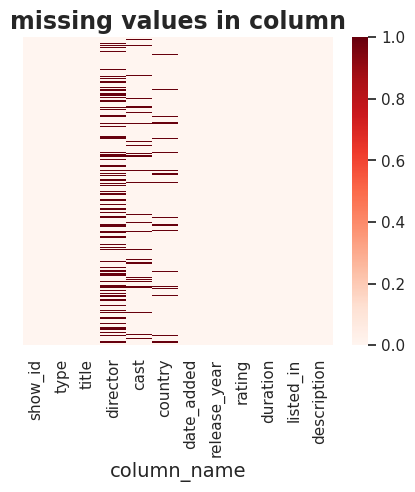

In [13]:
# Visualizing the missing values
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),cbar=True, yticklabels=False,cmap='Reds')
plt.xlabel("column_name", size=14)
plt.title("missing values in column",weight="bold",size=17)
plt.show()

In [14]:
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [15]:
df.shape

(7777, 12)

In [16]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Here we have handeled the missing values.

### What did you know about your dataset?

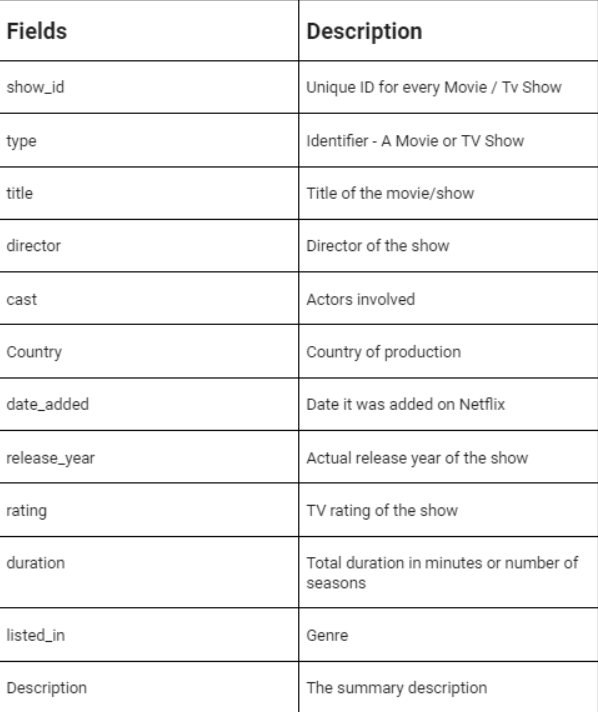

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [18]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7777,7777,7777,7777,7777,7777,7777,7777.000000,7777,7777,7777,7777
unique,7777,2,7777,4050,6822,682,1565,NaN,14,216,491,7759
top,s1,Movie,3%,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2379,718,2549,118,NaN,2868,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [19]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Variables Description




*   11 variables have data types as object
*   Only 1 vaiable which Is 'release_year' has data type as integer.



### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
df.nunique()

show_id         7777
type               2
title           7777
director        4050
cast            6822
country          682
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

In [21]:
df.nunique().sum()

37228

In [22]:
for i in df.columns:
  print(f"No. of unique values in {i} is {df[i].nunique()}")

No. of unique values in show_id is 7777
No. of unique values in type is 2
No. of unique values in title is 7777
No. of unique values in director is 4050
No. of unique values in cast is 6822
No. of unique values in country is 682
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 491
No. of unique values in description is 7759


## ***3.Exploratory Data Analysis***

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

# **Uni-Variate Analysis:**

#### Chart - 1 Type

In [23]:
# Chart - 1 visualization code
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

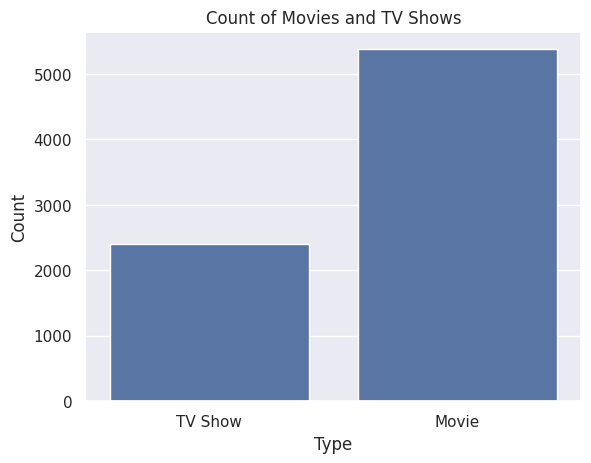

In [24]:
sns.countplot(data=df, x='type')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

As we needed to compare the total number of TV Shows & Movies listed on Netflix count plot is the best chart.

##### 2. What is/are the insight(s) found from the chart?

Netflix has 5377 movies and 2400 TV shows, there are more number movies on Netflix than TV shows

#### Chart - 2 Ratings

In [25]:
# Chart - 2 visualization code
df['rating'].value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [26]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)
df['target_ages'].head()

0    Adults
1    Adults
2    Adults
3     Teens
4     Teens
Name: target_ages, dtype: object

In [27]:
df['target_ages'].value_counts()

Adults        3624
Teens         2314
Older Kids    1327
Kids           512
Name: target_ages, dtype: int64

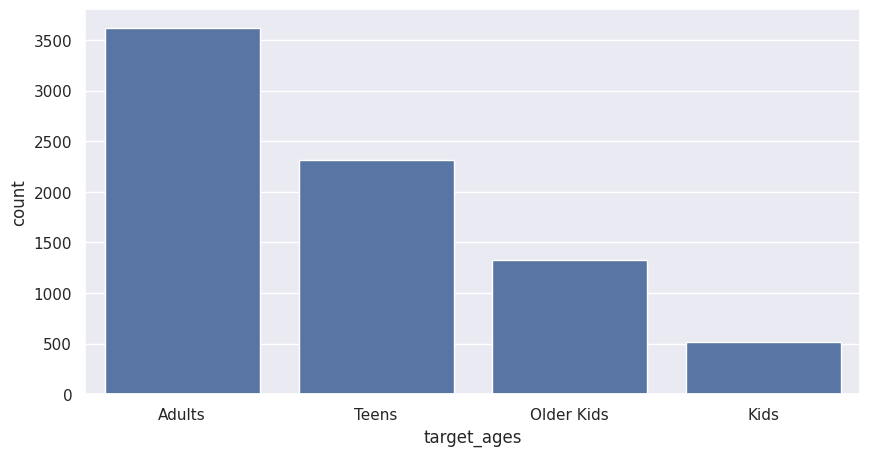

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='target_ages', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

Here we needed to compare TV Shows & Movies for kids and adults or based on the age group.

For that purpose countplot is more feasible.

##### 2. What is/are the insight(s) found from the chart?

**Around 50% of shows on Netflix are produced for adult audience. Followed by Teens, older kids and kids. Netflix has the least number of shows that are specifically produced for kids than other age groups.**

#### Chart - 3 Typecasting 'date_added' to datetime:

In [29]:
# Chart - 3 visualization code
df["date_added"].head()

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

In [30]:
df["date_added"] = pd.to_datetime(df['date_added'])
df["date_added"].head()

0   2020-08-14
1   2016-12-23
2   2018-12-20
3   2017-11-16
4   2020-01-01
Name: date_added, dtype: datetime64[ns]

In [31]:
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [32]:
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,target_ages,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,2020


Text(0.5, 1.0, 'distribution by released year')

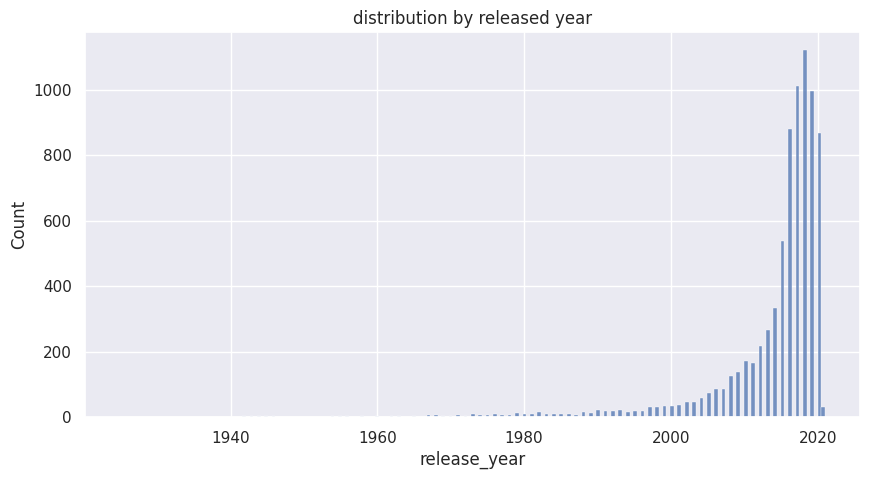

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

Text(0.5, 0, 'Months')

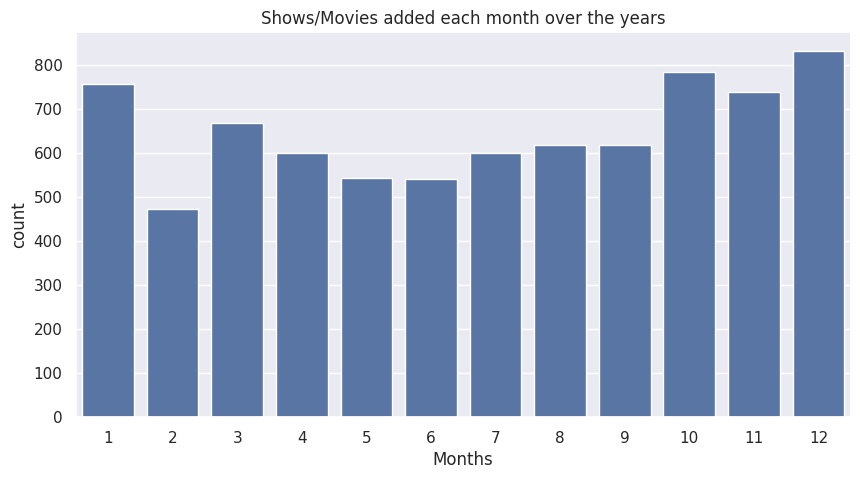

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'month_added' , data = df)
plt.title('Shows/Movies added each month over the years')
plt.xlabel('Months')

##### 1. Why did you pick the specific chart?



*   Histograms provide a visual summary of the distribution of data values. They show the frequency or count of data points within different intervals or bins, allowing you to quickly grasp the central tendency, spread, and shape of the data.Thats why I have used 'histplot'
*   I have used countplot in order to compare the amount of TV Shows / Movies added by Netflix in each month.



##### 2. What is/are the insight(s) found from the chart?



*   The shows were added on Netflix between 1st January 2008 and 16th January 2021.
*   Netflix has greater number of new movies / TV shows than the old ones.

*   Over the years a greater number of shows were added in the months of October, November, December, and January.
*   Netflix continuous to add more shows/movies on its platform over the years.

*   There is a decrease in the number of shows/movies added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
*   We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.







#### Chart - 4 Director

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

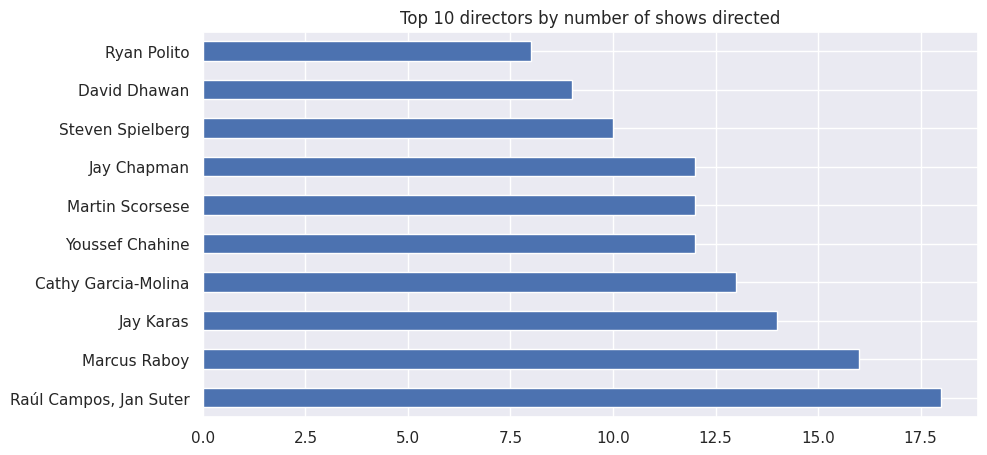

In [35]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

##### 1. Why did you pick the specific chart?



*   A horizontal bar graph, often referred to as a horizontal bar plot or a barh graph, is a type of chart where categorical data is represented by horizontal bars.
*   Horizontal bar graphs make it easy to compare the values of different categories side by side in this case the 'director'.



##### 2. What is/are the insight(s) found from the chart?

Raúl Campos & Jan Suter have directed the most amount of TV Shows & Movies which are uploaded by netflix and are the highest than everyone in the dataset.

#### Chart - 5 Country & Listed In

In [36]:
# Chart - 5 visualization code
df['country'].value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [37]:
df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [38]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [39]:
df['country'].value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [40]:
df['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

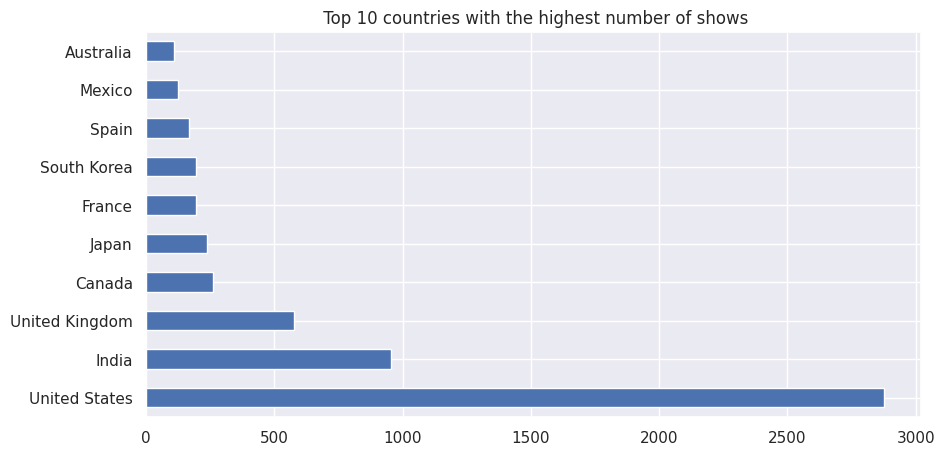

In [41]:
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

Text(0.5, 1.0, 'Top 10 genres')

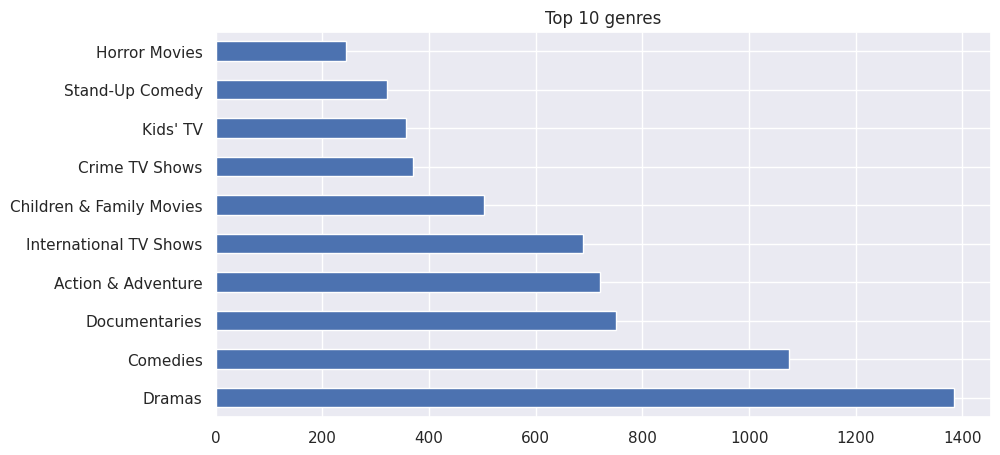

In [42]:
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?




*   A horizontal bar graph, often referred to as a horizontal bar plot or a barh graph, is a type of chart where categorical data is represented by horizontal bars.
*   Horizontal bar graphs make it easy to compare the values of different categories side by side in this case ' Top 10 countries with the highest number of shows' & 'Top 10 generes'




##### 2. What is/are the insight(s) found from the chart?



*   There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
*   The highest number of movies / TV shows were based out of the US, followed by India and UK.

*   The dramas is the most popular genre followed by comedies and documentries.
*   The majority of the shows on Netflix are catered to the needs of adult and teens population.





# **Bivariate Analysis :**

#### Chart - 6

In [43]:
# Chart - 6 visualization code
print(f"number of director who directed movie : {df[df['type']=='Movie'][~(df['director']=='Unknown')].value_counts().sum()}")
print(f"number of director who directed TV Show :{df[df['type']=='TV Show'][~(df['director']=='Unknown')].value_counts().sum()}")

number of director who directed movie : 5214
number of director who directed TV Show :184


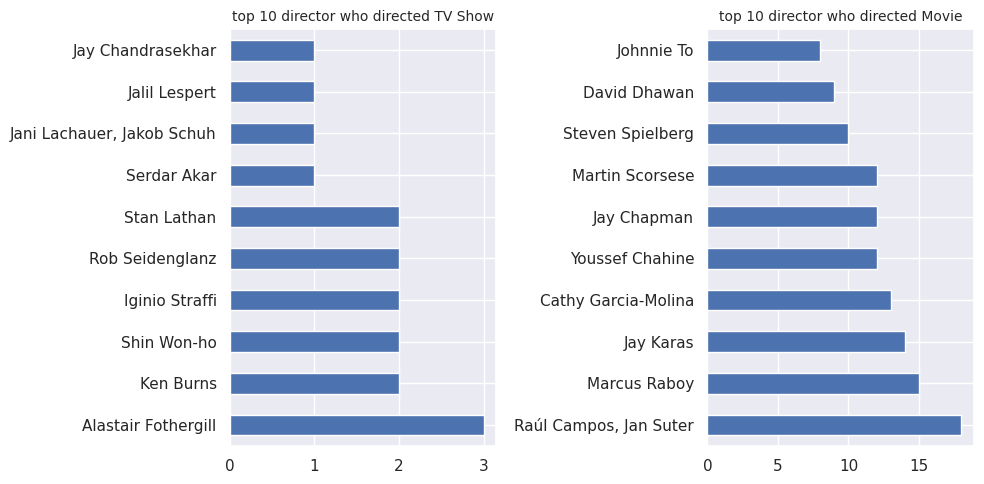

In [44]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

# top 10 director who directed TV show
show =df[df['type']=='TV Show'][~(df['director']=='Unknown')].director.value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=10)


# top 10 director who directed movie
movie =df[df['type']=='Movie'][~(df['director']=='Unknown')].director.value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=10)

plt.tight_layout()
plt.show()

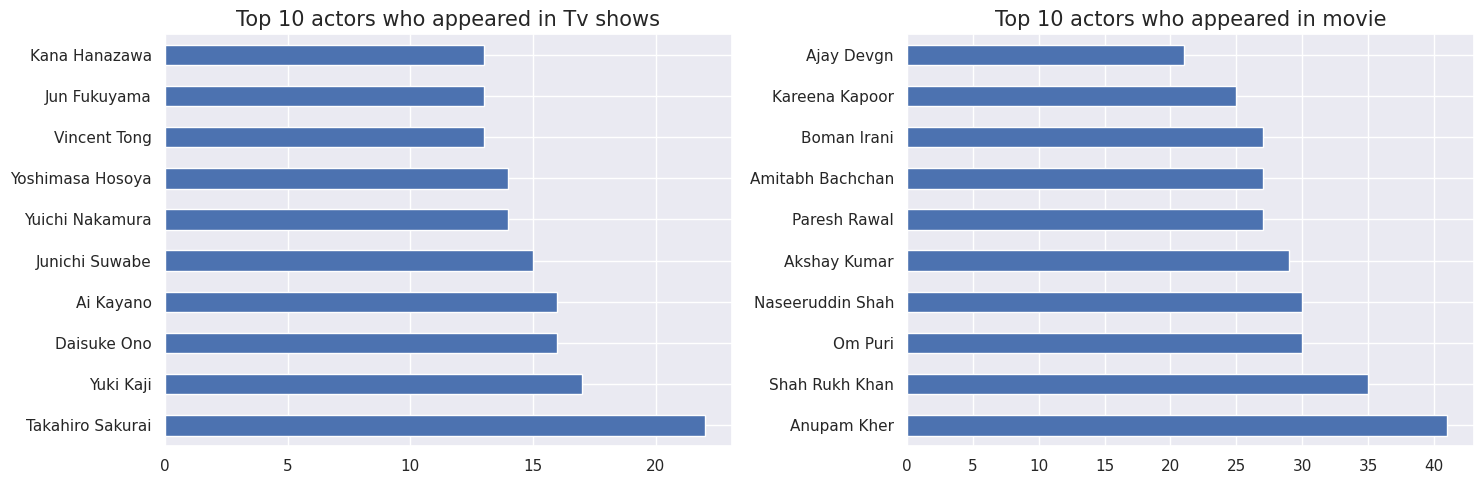

In [45]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 TV shows actor
TV_shows = df[df['type']=='TV Show'][~(df['cast']=='Unknown')].cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=15)

# top 10 Movie actor
movies = df[df['type']=='Movie'][~(df['cast']=='Unknown')].cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=15)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



*   Horizontal bar graphs make it easy to compare the values of different categories side by side as we saw in above visualisations.



##### 2. What is/are the insight(s) found from the chart?



*   Alastair Fothergill has directed three TV shows, the most of any director.  
*   Raul Campos and Jan Suter have togather directed in 18 movies, higher than everyone. This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina.
*   Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.
*   Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.



#### Chart - 7 Duration

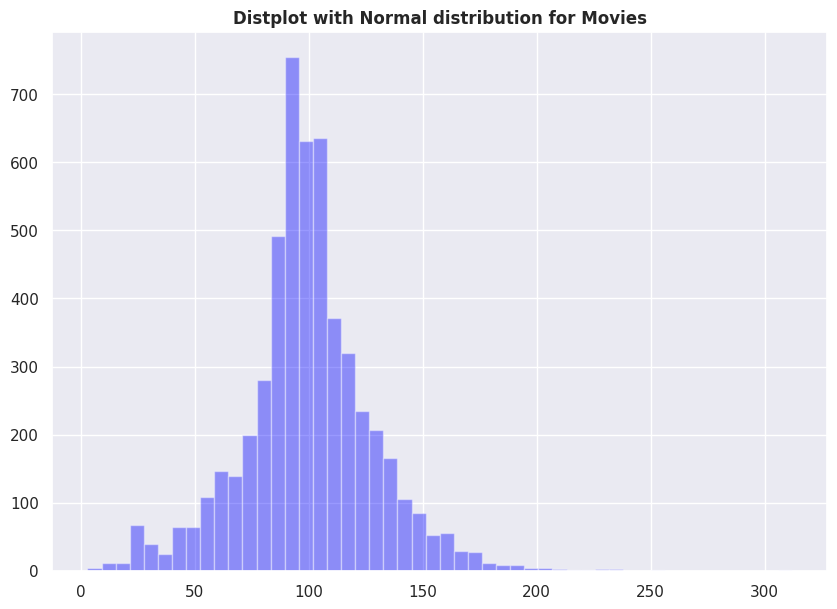

In [46]:
# Chart - 7 visualization code
plt.figure(figsize=(10,7))
sns.distplot(df[df['type']=='Movie']['duration'].str.extract('(\d+)'),kde=False, color=['blue'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

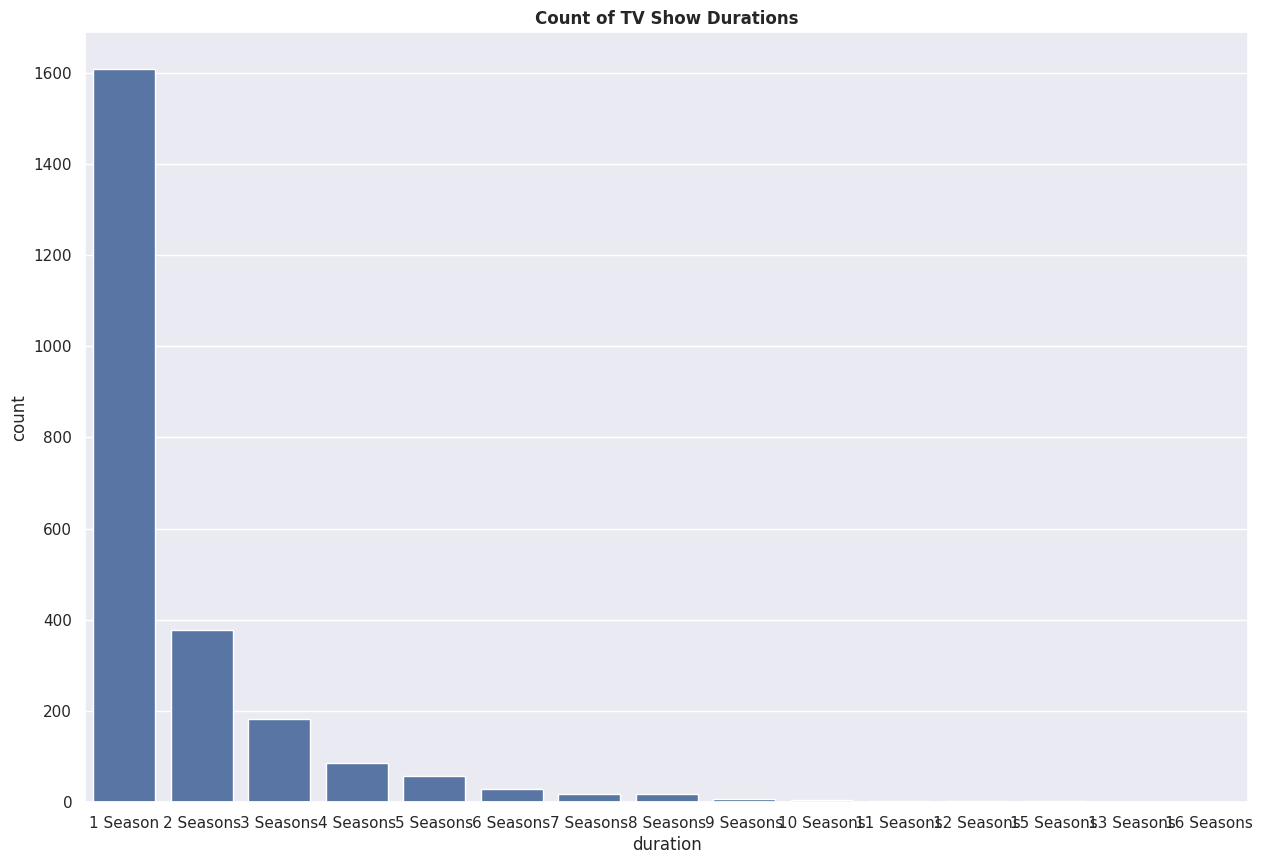

In [47]:
plt.figure(figsize=(15,10))
tv_show_durations = df[df['type'] == 'TV Show']['duration']
ordered_durations = tv_show_durations.value_counts().index

sns.countplot(data=df[df['type'] == 'TV Show'], x='duration', order=ordered_durations)
plt.title('Count of TV Show Durations',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?



*   As we needed to compare the total time duration of TV Shows & Movies listed on Netflix count plot or dist plot is the best chart.

##### 2. What is/are the insight(s) found from the chart?



*   Most of the movies have duration of minutes between 50 min to 150 min
*   There are highest number of tv_shows consisting of single season



#### Chart - 8 Description

In [48]:
# Chart - 8 visualization code
from wordcloud import WordCloud, STOPWORDS
text = " ".join(word for word in df['description'])

In [49]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

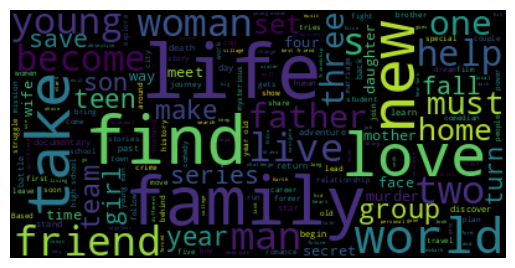

In [50]:
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?


*   This code snippet is specifically used to display a word cloud generated from text data using Matplotlib, with the axis turned off for a cleaner visualization.
*   The 'bilinear' interpolation method is chosen to ensure smooth rendering of the word cloud image.

##### 2. What is/are the insight(s) found from the chart?

Most of the comman words present in description column are family, find, life, love, new, take, world, friend, live.

#### Chart - 9 No. of Movies and TV Shows added

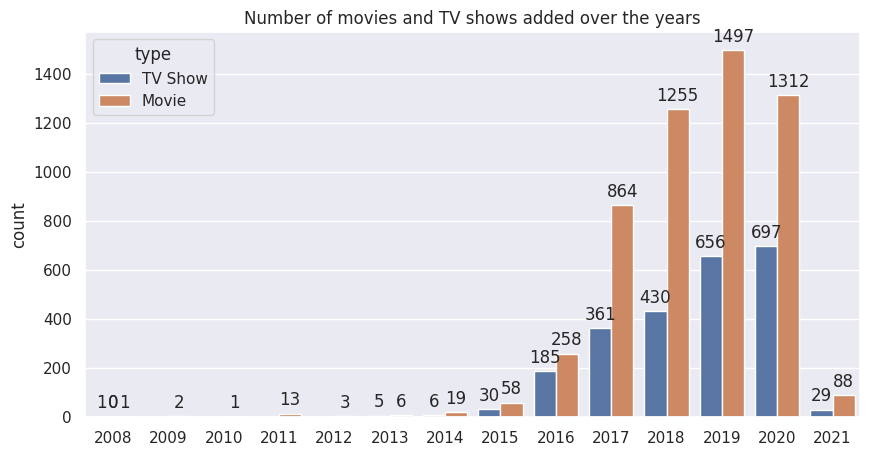

In [51]:
# Chart - 9 visualization code
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

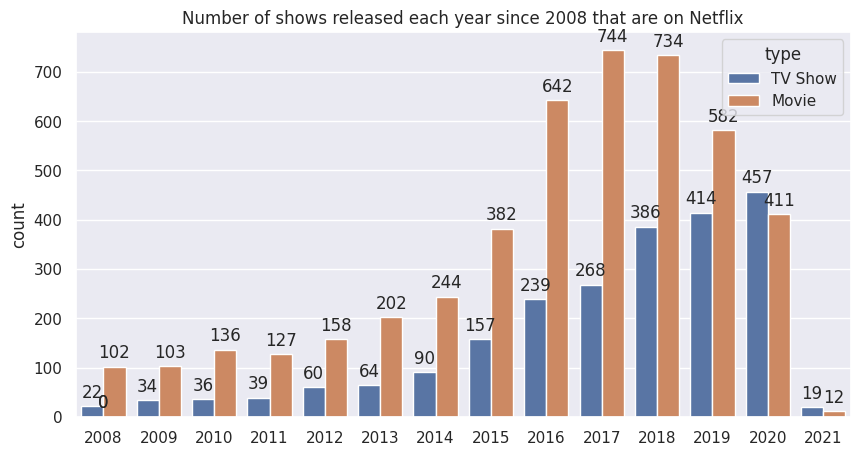

In [52]:
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type', order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

We have used countplot in order to compare number of movies and TV shows added over the years and number of shows released each year since 2008 that are on netflix side by side.

##### 2. What is/are the insight(s) found from the chart?


*   Over the years, Netflix has consistently focused on adding more shows in its platform.


*   Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
*   This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

#### Chart - 10 Average movie length over the years

In [53]:
# Chart - 10 visualization code
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

Text(0.5, 0, 'Year')

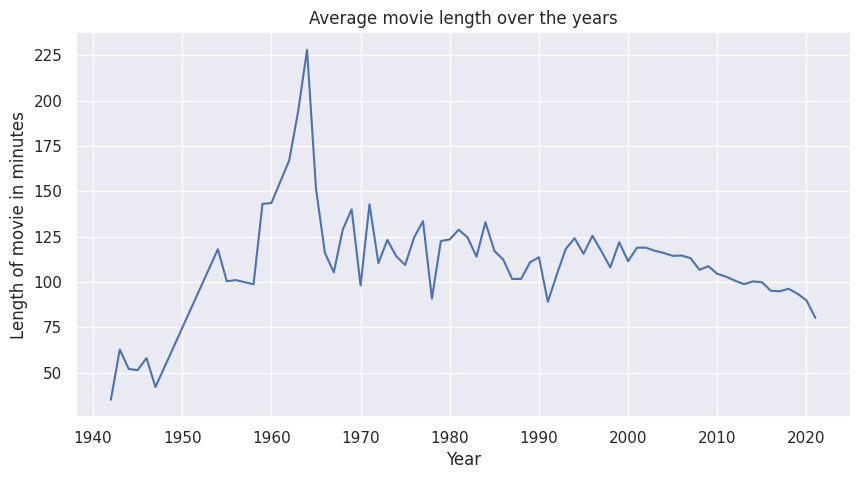

In [54]:
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

 A line plot is used to visualize the average length of movies over the years as per the dataset.

##### 2. What is/are the insight(s) found from the chart?



*   Netflix has several movies on its site including those that were released in way back 1942.

*   Movies made in the 1940s had a fairly short duration on average.
*   On an average movies made in the 1960s have the longest movie length.


*   The average length of a movie has been gradually decreasing since the 2000s.



#### Chart - 11

In [55]:
# Chart - 11 visualization code
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
target_ages,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Teens,0.162162,0.173469,0.561715,0.347458,0.130081,0.365979,0.113095,0.211806,0.240181,0.274704


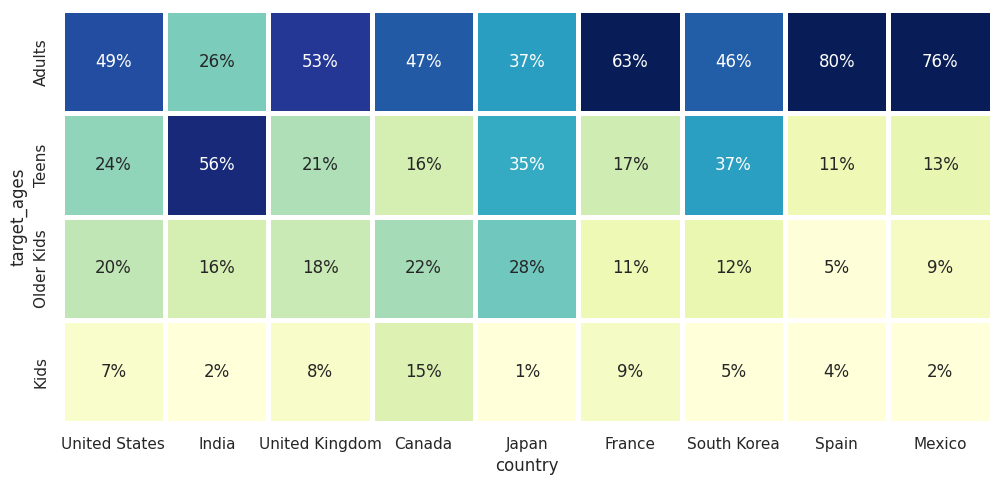

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

 A heatmap is used to visualize the relationship between two categorical variables: age group('target_ages') and country.

##### 2. What is/are the insight(s) found from the chart?



*   The US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!


*   Also, Mexico and Spain have similar content on Netflix for different age groups.



#### Chart - 12 Showing percentage of originals and others in movies

([<matplotlib.patches.Wedge at 0x7e6ab3d00bb0>,
 [Text(-1.0000406880635573, -0.45816877045185783, 'Others'),
  Text(1.0909534778875167, 0.4998204768565725, 'Originals')],
 [Text(-0.5454767389437584, -0.24991023842828605, '63.675%'),
  Text(0.6363895287677181, 0.2915619448330006, '36.325%')])

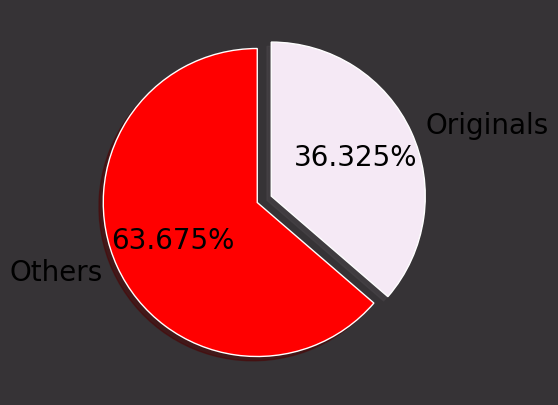

In [57]:
# Chart - 12 visualization code
df['originals'] = np.where(df['release_year'] == df['year_added'], 'Yes', 'No')
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(df['originals'].value_counts(), explode=explode, autopct='%.3f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

##### 1. Why did you pick the specific chart?


A pie chart is used in this case to visualize the proportion of "Originals" compared to other content categories in the dataset.

##### 2. What is/are the insight(s) found from the chart?



*   36% movies are released on Netflix. 64% movies added on Netflix were released earlier by different mode and added to netflix later.
*   Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named as Netflix Originals.


#### Chart - 13 - Correlation Heatmap

In [58]:
# Correlation Heatmap visualization code
correlation = df.corr()

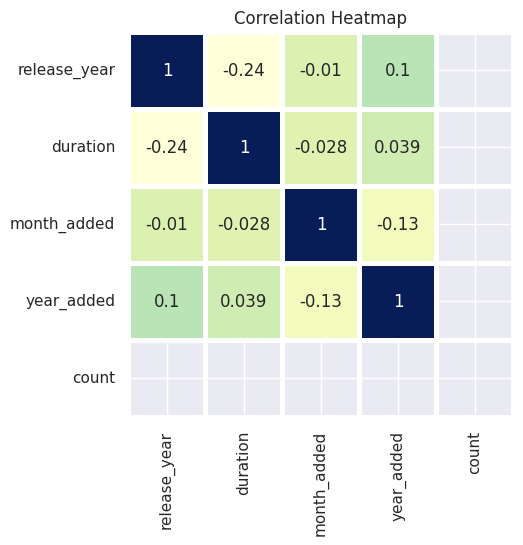

In [59]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True,cmap="YlGnBu",square=True, linewidth=2.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is used in this case to visualize the correlation matrix.

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 14 - Pair Plot

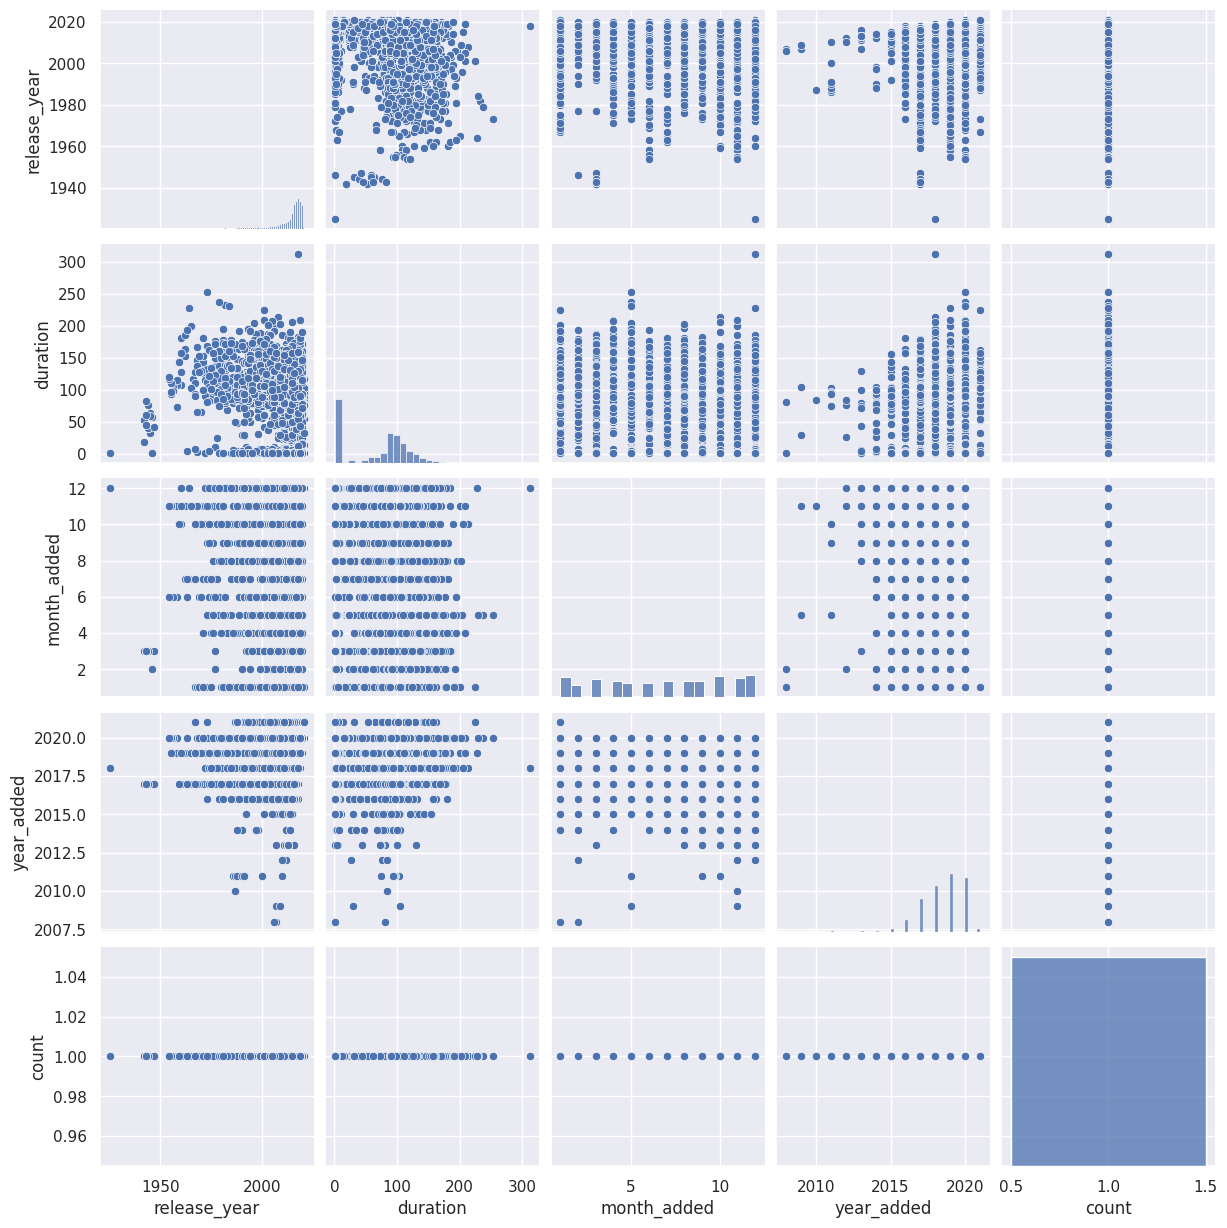

In [60]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

## ***4. Hypothesis Testing***

### Based on your chart experiments, define  hypothetical statements from the dataset. In the next questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

#### 2. Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value
movies = df[df['type']== 'Movie']

In [62]:
group_by_= df[['duration','type']].groupby(by='type')
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.307978
1,TV Show,1.760833


In [63]:
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')

M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.560603
dtype: float64


In [64]:
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2400
dof 7775
SP_2 = duration    252.849635
dtype: float64
SP duration    15.901246
dtype: float64
tvalue 249.8923650639716


In [65]:
stats.t.ppf(0.025,dof)

-1.9602691465072455

In [66]:
stats.t.ppf(0.975,dof)

1.960269146507245

As we can see the t-value is not the the range; Therefore the null hypothesis is rejected.

As a result, the duration which has more than 90 mins are Movies.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [67]:
# We already have handeled missing values.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [68]:
# There are no such outliers present in the given data.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [69]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Creating final_text column using all text column which one is used for model building purpose.

In [70]:
df['final_text'] = df['description'] + ' ' + df['listed_in'] +' ' + df['rating'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['director']
df['final_text']

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: final_text, Length: 7777, dtype: object

In [71]:
df.final_text[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows TV-MA João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil Unknown'

In [72]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
target_ages     object
month_added      int64
year_added       int64
count            int64
originals       object
final_text      object
dtype: object

In [73]:
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 2. Removing Punctuations

In [74]:
# Remove Punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [75]:
df['final_text'] = df['final_text'].apply(remove_punctuation)

In [76]:
df['final_text'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor International TV Shows TVMA João Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso Frateschi Brazil Unknown'

#### 3. Removing Stopwords & Lower Case

In [77]:
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [78]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

In [79]:
df['final_text']=df['final_text'].apply(stopwords)

In [80]:
df['final_text'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor international tv shows tvma joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil unknown'

#### 4. Lemmatization

In [81]:
# Lemmatization
import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [82]:
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [83]:
df['final_text'] = lemmatize_verbs(df['final_text'])

#### 5. Tokenization

In [84]:
# Tokenization
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

df['final_text'] = df['final_text'].apply(lambda x: tokenizer.tokenize(x))

#### 6. Removing non-ASCII characters

In [85]:
# POS Taging
def remove_non_ascii(words):
    new_words = []
    for word in words:
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
    return new_words

In [86]:
df['final_text']= df['final_text'].apply(remove_non_ascii)

In [87]:
df['final_text'][0]

['future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 '3',
 'saved',
 'squalor',
 'international',
 'tv',
 'shows',
 'tvma',
 'joao',
 'miguel',
 'bianca',
 'comparato',
 'michel',
 'gomes',
 'rodolfo',
 'valente',
 'vaneza',
 'oliveira',
 'rafael',
 'lozano',
 'viviane',
 'porto',
 'mel',
 'fronckowiak',
 'sergio',
 'mamberti',
 'zeze',
 'motta',
 'celso',
 'frateschi',
 'brazil',
 'unknown']

#### 7. Text Vectorization

In [88]:
# Vectorizing Text
final_data = df['final_text']
final_data

0       [future, elite, inhabit, island, paradise, far...
1       [devastating, earthquake, hits, mexico, city, ...
2       [army, recruit, found, dead, fellow, soldiers,...
3       [postapocalyptic, world, ragdoll, robots, hide...
4       [brilliant, group, students, become, cardcount...
                              ...                        
7782    [lebanons, civil, war, deprives, zozo, family,...
7783    [scrappy, poor, boy, worms, way, tycoons, dysf...
7784    [documentary, south, african, rapper, nasty, c...
7785    [dessert, wizard, adriano, zumbo, looks, next,...
7786    [documentary, delves, mystique, behind, bluesr...
Name: final_text, Length: 7777, dtype: object

In [89]:
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 10000)
tfidf_matrix = tfidf.fit_transform(final_data)

array = tfidf_matrix.toarray()

In [90]:
print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.18947232 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
shape of the vector : (7777, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?



*   We will vectorized the corpus using TFIDF vectorizer, where TFIDF stands for Term Frequency Inverse Document Frequency.

 TFIDF=TF*IDF
*   Text Vectorization is the process of converting text into numerical representation



### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
#DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***